# Week 3 handin

# Week 4 Exercise with Numpy

Use only numpy (not pandas) in these exercises
#### Exercise 1
1. Open the file './data/befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)`
3. Using this data:
```python
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}
```
Find out how many people lived in each of the 11 areas in 2015
4. Make a bar plot to show the size of each city area from the smallest to the largest
5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
6. How many of those were from the other nordic countries (not dk). Hint: see notebook: "04 Numpy"
7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

#### Exercise 2  A bit harder (Extra only if you have the time)

1. From "Danmarks Statistik" download demographic data here:
https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Code&delimiter=Semicolon&OMR%C3%85DE=000%2C084%2C147%2C400%2C085%2C083%2C082%2C081%2C851%2C461%2C561%2C751&K%C3%98N=1%2C2&ALDER=0%2C1%2C2%2C3%2C4%2C5%2C6%2C7%2C8%2C9%2C10%2C11%2C12%2C13%2C14%2C15%2C16%2C17%2C18%2C19%2C20%2C21%2C22%2C23%2C24%2C25%2C26%2C27%2C28%2C29%2C30%2C31%2C32%2C33%2C34%2C35%2C36%2C37%2C3%2C39%2C40%2C41%2C42%2C43%2C44%2C45%2C46%2C47%2C48%2C49%2C50%2C51%2C52%2C53%2C54%2C55%2C56%2C57%2C58%2C59%2C60%2C61%2C62%2C63%2C64%2C65%2C66%2C67%2C68%2C69%2C70%2C71%2C72%2C73%2C74%2C75%2C76%2C77%2C78%2C79%2C80%2C81%2C82%2C83%2C84%2C85%2C86%2C87%2C88%2C89%2C90%2C91%2C92%2C93%2C94%2C95%2C96%2C97%2C98%2C99%2C100&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1


2. clean up the data so it only contains numbers. (If you find this hard to do then Pandas can help (we will cover it next week)
```python
import pandas as pd 
url = 'url from above here'
df = pd.read_csv(url,sep=';')
df['TID'] = df['TID'].map(lambda x:x[:-2]) #cut the last 2 characters
df.to_csv('demografic_cleaned.csv',header=False, index=False)
```
Now you have csv data with columns: OMRÅDE;KØN;ALDER;TID;INDHOLD
3. Now load your demographic data with numpy. (Hint: use np.loadtxt() with dtype and delimiter).
4. Use file: BY_KODER_demographics.csv to get cities from the city codes
5. Now find out which city in 2020 has the highest percentage of men (gender code 1),(Hint: create a function to return summed up data by city code ala: def summed_by_city(city_code): returning pct_male 
6. Create a line chart with 5 lines showing population changes in the 5 largest cities from 2008 to 2020


## 02 Status
Here is a status on the handin. How far you got. What is implemented and what is not

## 03 Solution part 1

In [1]:
import numpy as np

# 1 - 2. Open csv with getfromtxt
filename = "../data/befkbhalderstatkode.csv"
data: np.ndarray = np.genfromtxt(filename, delimiter=",", dtype=np.uint, skip_header=1)
print(data)

[[2015    1    0 5100  614]
 [2015    1    0 5104    2]
 [2015    1    0 5106    1]
 ...
 [1992   99   89 5100    1]
 [1992   99   90 5180    1]
 [1992   99   93 5100    1]]


In [2]:
# 3. How many people lived in each of the 11 areas in 2015

neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}

def get_people_in_area(area_number: int, cities: dict):
    mask = (data[:, 0] == 2015) & (data[:, 1] == area_number)
    cities.setdefault(neighb[area_number], np.sum(data[mask][:, 4]))

cities = dict()
[get_people_in_area(n, cities) for n in neighb.keys()]
print(cities)

{'Indre By': 51937, 'Østerbro': 75113, 'Nørrebro': 78802, 'Vesterbro/Kgs. Enghave': 61623, 'Valby': 51727, 'Vanløse': 39537, 'Brønshøj-Husum': 43908, 'Bispebjerg': 53604, 'Amager Øst': 55205, 'Amager Vest': 64967, 'Udenfor': 3872}


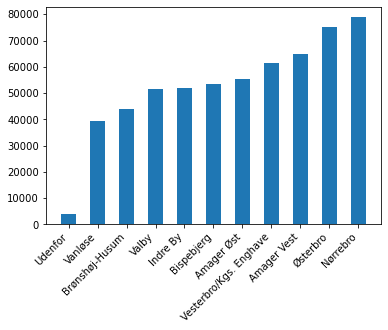

In [3]:
# 4. Make a bar plot to show the size of each city area from the smallest to the lartest.
import matplotlib.pyplot as plt

sorted_people = dict(sorted(cities.items(), key=lambda x: x[1]))

plt.bar(list(sorted_people.keys()), list(sorted_people.values()),width=0.5, align='center')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')
plt.show()

In [4]:
# 5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015.
mask = (data[:, 2] > 65) & (data[:, 0] == 2015)
d = data[mask]

print(np.sum(d[:, 4]))

55750


In [5]:
# 6. How many of those were from other nordic countries
# Danes = STATKODE == 5100
no_nordic = d[d[:, 3] != 5100]
print(np.sum(no_nordic[:, 4]))

3451


{1992: 47854, 1993: 47589, 1994: 47538, 1995: 47633, 1996: 47734, 1997: 48275, 1998: 49109, 1999: 49520, 2000: 50312, 2001: 50756, 2002: 51039, 2003: 51045, 2004: 50869, 2005: 50643, 2006: 50303, 2007: 50964, 2008: 51466, 2009: 53351, 2010: 55315, 2011: 57150, 2012: 58411, 2013: 59211, 2014: 60328, 2015: 61623}
{1992: 62221, 1993: 62583, 1994: 63050, 1995: 63572, 1996: 64503, 1997: 65856, 1998: 66148, 1999: 66295, 2000: 66673, 2001: 66877, 2002: 67020, 2003: 67550, 2004: 67516, 2005: 67671, 2006: 67351, 2007: 67330, 2008: 67964, 2009: 68769, 2010: 69951, 2011: 70938, 2012: 72400, 2013: 73388, 2014: 74521, 2015: 75113}


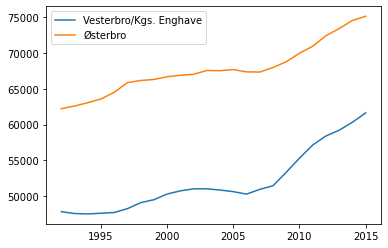

In [24]:
# 7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015
# Vesterbro = 4, Østerbro = 2

def get_dates(people_dict: list, area_number: int, current_date: int):
    if (current_date > 2015):
        return people_dict
    the_data = data[(data[:, 1] == area_number) & (data[:, 0] == current_date)]
    people_dict.setdefault(current_date, np.sum(the_data[:, 4]))
    current_date += 1
    return get_dates(people_dict, area_number, current_date)

def get_plot(area_number: int):
    people = get_dates(dict(), area_number, 1992)
    print(people)
    plt.plot(list(people.keys()), list(people.values()), label=neighb[area_number])

get_plot(4)
get_plot(2)

plt.legend()

## 04 Solution part 2

In [7]:
# 2.1